In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from colour import Color

In [2]:
num_paths = []
num_overlaps = []
with open("segment-10000.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        try:
            num_paths.append(int(row[5]))
            num_overlaps.append(int(row[6]) / int(row[5]))
        except ValueError:
            continue

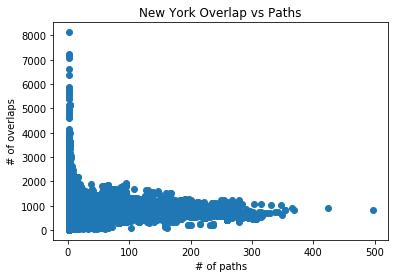

In [3]:
plt.title("New York Overlap vs Paths")
plt.scatter(num_paths, num_overlaps)
plt.ylabel("# of overlaps")
plt.xlabel("# of paths")
plt.show()

cdf(x) as discussed

cdf(x) = |#j: O_ij > x| / |#j in p_i|

In [19]:
def generate_cdf(data):
    index = 0
    sorted_data = sorted(data)
    cdf = []
    rg = np.arange(0.0, 1.0, granularity)
    for bound in rg:
        while index < len(sorted_data) and sorted_data[index] < bound:
            index += 1
        cdf.append((len(sorted_data) - index) / len(sorted_data))
    return cdf

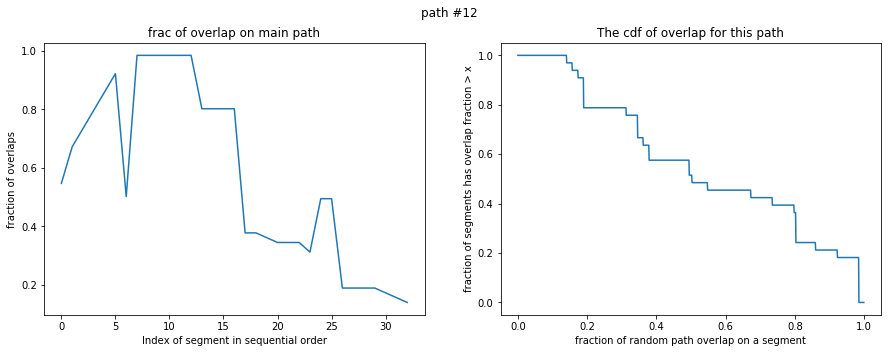

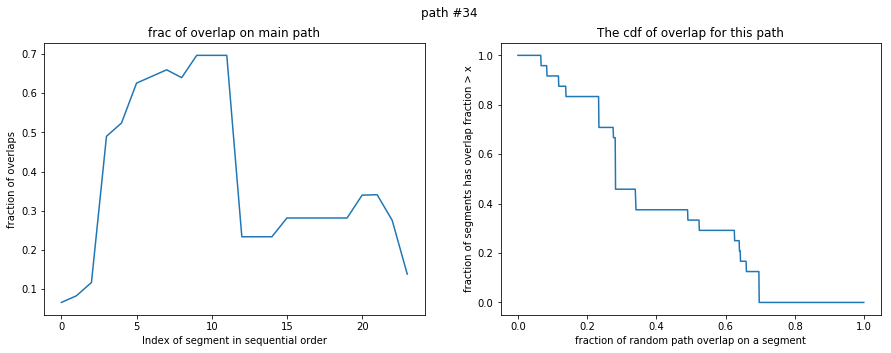

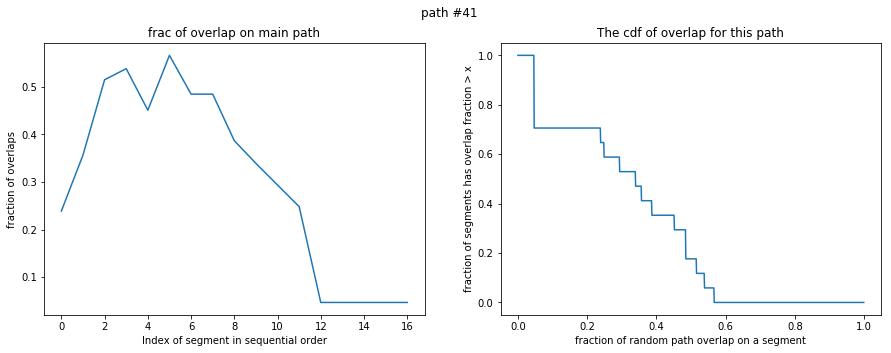

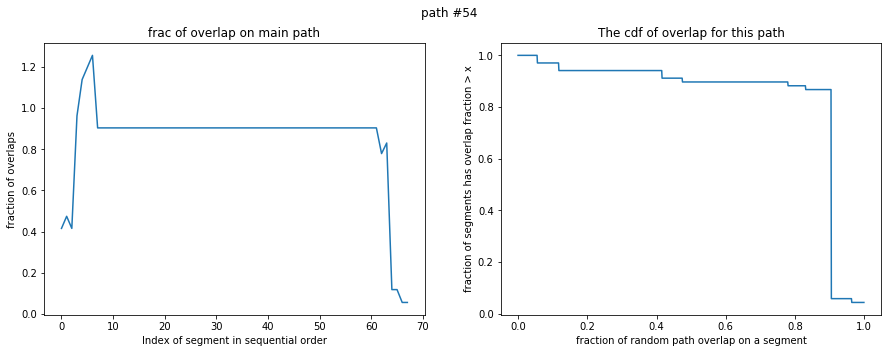

In [21]:
granularity = 0.001
paths = [12, 34, 41, 54]
with open("path.csv", "r") as f:
    lines = f.readlines()
    for line_num in paths:
        plt.figure(figsize=(15, 5))
        plt.suptitle("path #" + str(line_num))
        elements = lines[line_num].split(",")
        path_count = int(elements[0])
        seg_count = int(elements[1])
        seg_overlap = []
        for i in range(1, seg_count + 1):
            seg_overlap.append(int(elements[i * 2 + 1]) / path_count)
        plt.subplot(121)
        plt.title("frac of overlap on main path")
        plt.plot(seg_overlap)
        plt.xlabel("Index of segment in sequential order")
        plt.ylabel("fraction of overlaps")

        cdf = generate_cdf(seg_overlap)
        
        plt.subplot(122)
        plt.title("The cdf of overlap for this path")
        plt.plot(rg, cdf)
        plt.xlabel("fraction of random path overlap on a segment")
        plt.ylabel("fraction of segments has overlap fraction > x")
        plt.show()

In [5]:
def getRGBfromI(RGBint):
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red / 255, green / 255, blue / 255

In [6]:
blue = Color("blue")
colors = list(blue.range_to(Color("red"), 100000))

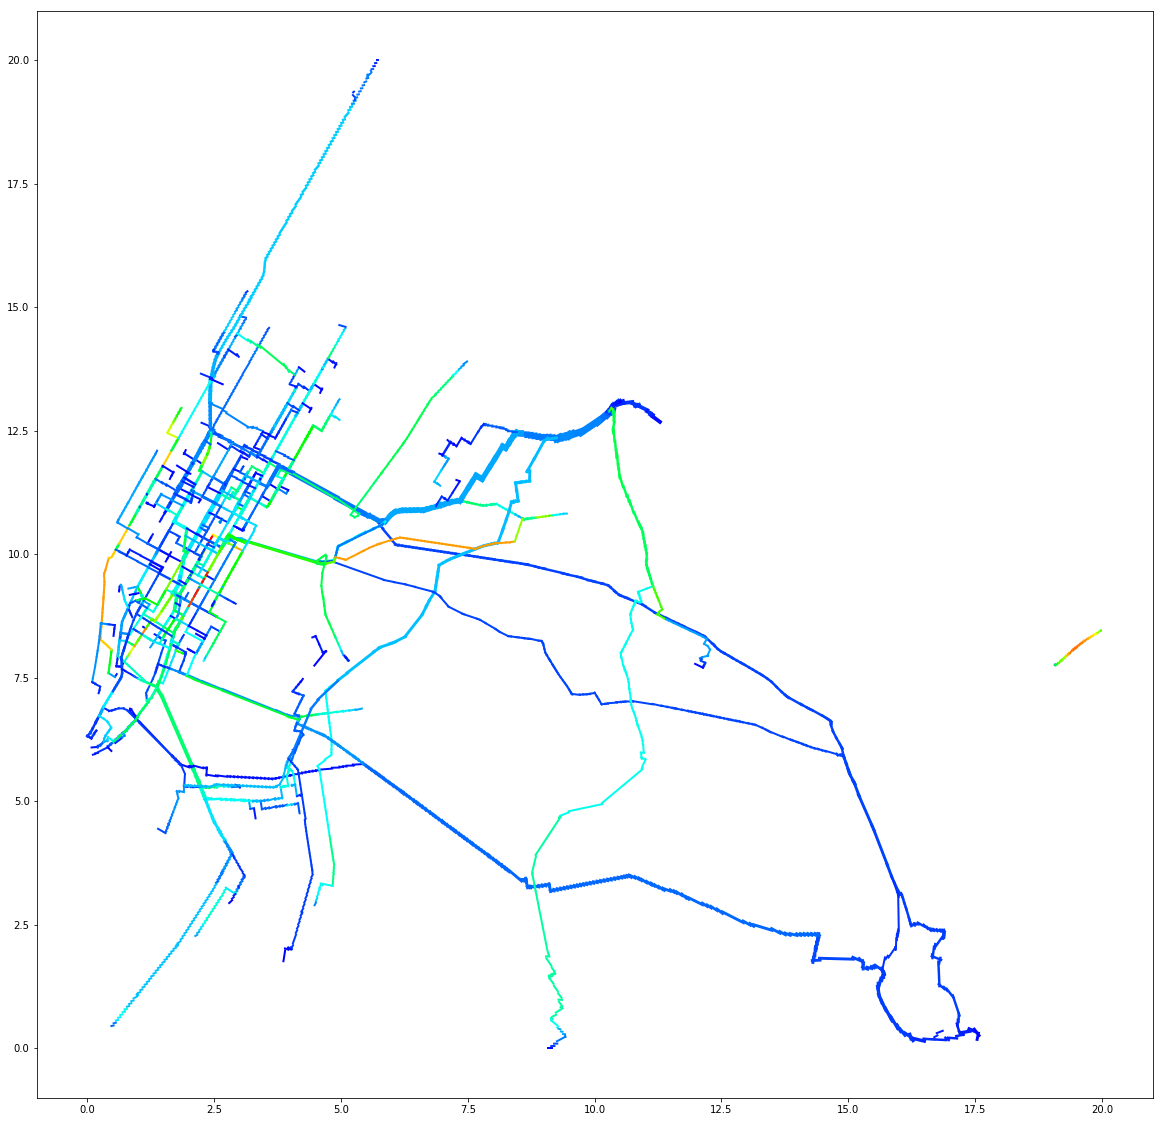

In [44]:
min_lat = 100
max_lat = -100
min_lon = 100
max_lon = -100
min_path = 100
max_path = 0
min_overlap = 100
max_overlap = 0
segments = []
fig_size = (20, 20)
with open("segment.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        try:
            start_lat = float(row[1])
            start_lon = float(row[2])
            end_lat = float(row[3])
            end_lon = float(row[4])
            num_path = int(row[5])
            num_overlap = int(row[6]) / num_path
            segments.append((start_lat, start_lon, end_lat, end_lon, num_path, num_overlap))
            min_lat = min(min(start_lat, end_lat), min_lat)
            max_lat = max(max(start_lat, end_lat), max_lat)
            min_lon = min(min(start_lon, end_lon), min_lon)
            max_lon = max(max(start_lon, end_lon), min_lon)
            min_path = min(min_path, num_path)
            max_path = max(max_path, num_path)
            min_overlap = min(min_overlap, num_overlap)
            max_overlap = max(max_overlap, num_overlap)
        except ValueError:
            continue
            
def plot_map(segments, fig_size=(20, 20), width_rg=(2, 7), color_rg=("blue", "red")):
    """
    segments: np 2d matrix: the columns are start lat, start lon, end lat, end lon, line width raw, line color raw
    """
    colors = list(Color(color_rg[0]).range_to(Color(color_rg[1]), 100000))
    plt.figure(figsize=fig_size)
    mins = np.min(segments, axis=0)
    maxs = np.max(segments, axis=0)
    # normalize
    segments = (segments - mins) / (maxs - mins)
    segments[:, :2] *= np.array(fig_size)
    segments[:, 2:4] *= np.array(fig_size)
    segments[:, 4] *= (width_rg[1] - width_rg[0])
    segments[:, 4] += width_rg[0]
    segments[:, 5] *= 99999
    for i in range(segments.shape[0]):
        plt.plot((segments[i, 1], segments[i, 3]),
                 (segments[i, 0], segments[i, 2]),
                 linewidth= segments[i, 4],
                 color=colors[int(segments[i, 5])].rgb)
        
plot_map(np.array(segments, dtype=np.float64))
plt.show()

cdf(x; t): 

|# of p_i has at lest x% of s_ij with (# of overlap) / (# s_ij) > t| / |# of p_i|

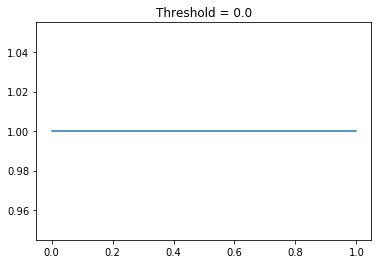

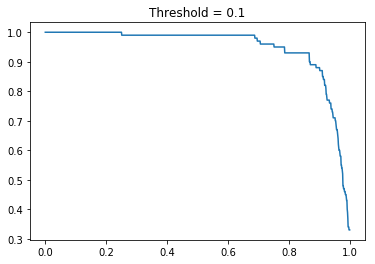

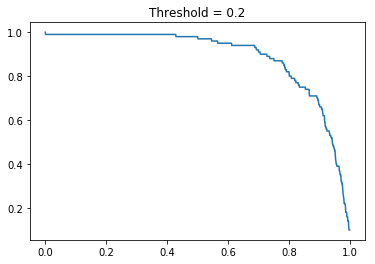

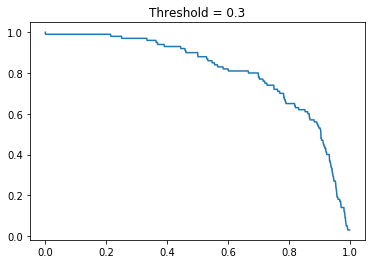

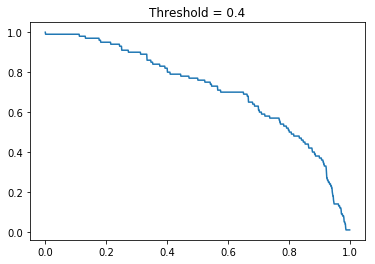

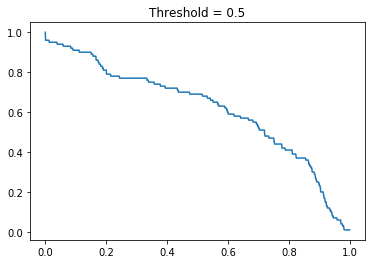

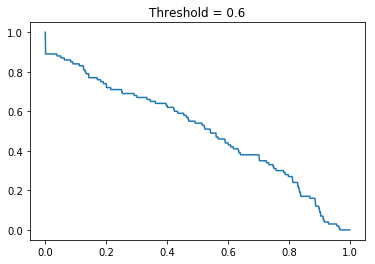

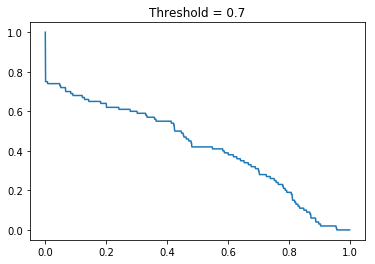

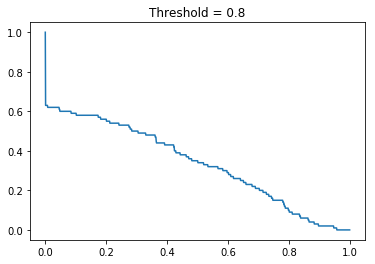

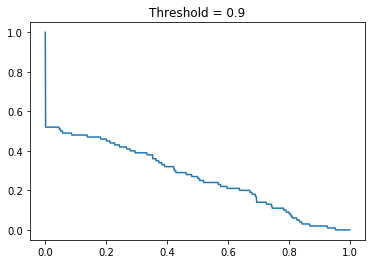

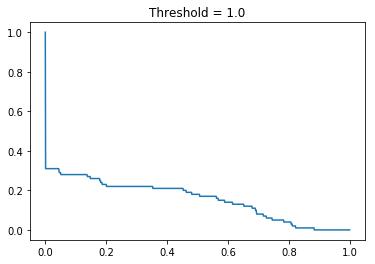

In [24]:
ts = np.arange(0, 1.1, 0.1)
granularity = 0.001
with open("path.csv", "r") as f:
    f.readline()
    lines = f.readlines()
    splited_lines = [line.split(",") for line in lines ]
    for i in range(len(splited_lines)):
        for j in range(len(splited_lines[i])):
            splited_lines[i][j] = int(splited_lines[i][j])
    for t in ts:
        plt.figure()
        path_overlap_count = []
        for line in splited_lines:
            path_count = line[0]
            seg_count = line[1]
            count = 0
            for i in range(1, seg_count + 1):
                if line[i * 2 + 1] / path_count > t:
                    count += 1
            path_overlap_count.append(count / seg_count)
        cdf = generate_cdf(path_overlap_count)
        plt.title("Threshold = " + str(t))
        plt.plot(rg, cdf)
    plt.show()